In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
train = pd.read_csv(r'C:\Users\Dell\Desktop\python\titanic\titanic_train.csv')

In [3]:
train

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25            26         1       3   
26            27         0       3   
27            28         0       1   
28            29         1       3   
29            30         0       3   
..           ...       ...     ...   
861          862         0       2   
862          863         1       1   
863          864         0       3   
864          865         0       2   
865          866         1       2   
866          867         1       2   
867          868         0       1   
868          869         0       3   
869          870         1       3   
870          871         0       3   
871          872         1       1   
872          873         0       1   
873          874         0       3   
874          875         1       2   
875          876         1       3   
876          877         0       3   
877          878         0       3   
878          879         0       3   
879          880         1       1   
880          881         1       2   
881          882         0       3   
882          883         0       3   
883          884         0       2   
884          885         0       3   
885          886         0       3   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
5                                     Moran, Mr. James    male   NaN      0   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
7                       Palsson, Master. Gosta Leonard    male   2.0      3   
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                  Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
10                     Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
12                      Saundercock, Mr. William Henry    male  20.0      0   
13                         Andersson, Mr. Anders Johan    male  39.0      1   
14                Vestrom, Miss. Hulda Amanda Adolfina  female  14.0      0   
15                    Hewlett, Mrs. (Mary D Kingcome)   female  55.0      0   
16                                Rice, Master. Eugene    male   2.0      4   
17                        Williams, Mr. Charles Eugene    male   NaN      0   
18   Vander Planke, Mrs. Julius (Emelia Maria Vande...  female  31.0      1   
19                             Masselmani, Mrs. Fatima  female   NaN

In [4]:
#Let's begin some exploratory data analysis! We'll start by checking out missing data!
#Here we can check survived data number of users

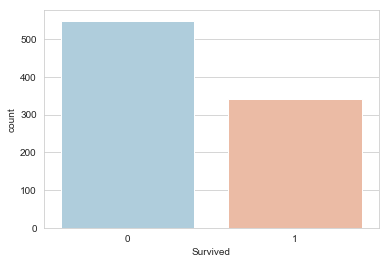

In [5]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')

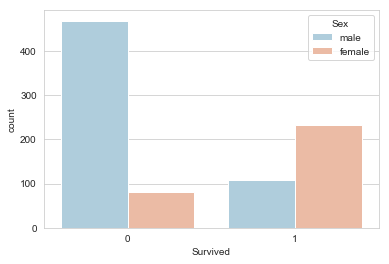

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,hue='Sex',palette='RdBu_r')

In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
train.info()
#Here Age are showing 714 menas 180 data are not available so we caculate average of age

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [9]:
train.drop(['PassengerId','Name','Ticket','Cabin'],1)


Survived  Pclass     Sex   Age  SibSp  Parch      Fare Embarked
0           0       3    male  22.0      1      0    7.2500        S
1           1       1  female  38.0      1      0   71.2833        C
2           1       3  female  26.0      0      0    7.9250        S
3           1       1  female  35.0      1      0   53.1000        S
4           0       3    male  35.0      0      0    8.0500        S
5           0       3    male   NaN      0      0    8.4583        Q
6           0       1    male  54.0      0      0   51.8625        S
7           0       3    male   2.0      3      1   21.0750        S
8           1       3  female  27.0      0      2   11.1333        S
9           1       2  female  14.0      1      0   30.0708        C
10          1       3  female   4.0      1      1   16.7000        S
11          1       1  female  58.0      0      0   26.5500        S
12          0       3    male  20.0      0      0    8.0500        S
13          0       3    male  39.0      1      5   31.2750        S
14          0       3  female  14.0      0      0    7.8542        S
15          1       2  female  55.0      0      0   16.0000        S
16          0       3    male   2.0      4      1   29.1250        Q
17          1       2    male   NaN      0      0   13.0000        S
18          0       3  female  31.0      1      0   18.0000        S
19          1       3  female   NaN      0      0    7.2250        C
20          0       2    male  35.0      0      0   26.0000        S
21          1       2    male  34.0      0      0   13.0000        S
22          1       3  female  15.0      0      0    8.0292        Q
23          1       1    male  28.0      0      0   35.5000        S
24          0       3  female   8.0      3      1   21.0750        S
25          1       3  female  38.0      1      5   31.3875        S
26          0       3    male   NaN      0      0    7.2250        C
27          0       1    male  19.0      3      2  263.0000        S
28          1       3  female   NaN      0      0    7.8792        Q
29          0       3    male   NaN      0      0    7.8958        S
..        ...     ...     ...   ...    ...    ...       ...      ...
861         0       2    male  21.0      1      0   11.5000        S
862         1       1  female  48.0      0      0   25.9292        S
863         0       3  female   NaN      8      2   69.5500        S
864         0       2    male  24.0      0      0   13.0000        S
865         1       2  female  42.0      0      0   13.0000        S
866         1       2  female  27.0      1      0   13.8583        C
867         0       1    male  31.0      0      0   50.4958        S
868         0       3    male   NaN      0      0    9.5000        S
869         1       3    male   4.0      1      1   11.1333        S
870         0       3    male  26.0      0      0    7.8958        S
871         1       1  female  47.0      1      1   52.5542        S
872         0       1    male  33.0      0      0    5.0000        S
873         0       3    male  47.0      0      0    9.0000        S
874         1       2  female  28.0      1      0   24.0000        C
875         1       3  female  15.0      0      0    7.2250        C
876         0       3    male  20.0      0      0    9.8458        S
877         0       3    male  19.0      0      0    7.8958        S
878         0       3    male   NaN      0      0    7.8958        S
879         1       1  female  56.0      0      1   83.1583        C
880         1       2  female  25.0      0      1   26.0000        S
881         0       3    male  33.0      0      0    7.8958        S
882         0       3  female  22.0      0      0   10.5167        S
883         0       2    male  28.0      0      0   10.5000        S
884         0       3    male  25.0      0      0    7.0500        S
885         0       3  female  39.0      0      5   29.1250        Q
886         0       2    male  27.0      0      0   13.0000        S
887

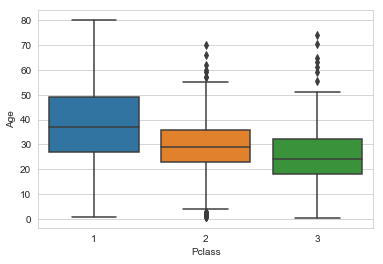

In [10]:
sns.boxplot(x='Pclass',y='Age',data=train)

In [11]:
def ageapprox(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [12]:
train['Age']=train[['Age','Pclass']].apply(ageapprox,axis=1)

In [13]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
train.dropna(inplace=True)
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [15]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)
train.drop(['Name','Ticket','Cabin','PassengerId','Fare','Pclass'],axis=1,inplace=True)
train = pd.concat([train,sex,embark],axis=1)

In [16]:
train

Survived   Age  SibSp  Parch  male  Q  S
1           1  38.0      1      0     0  0  0
3           1  35.0      1      0     0  0  1
6           0  54.0      0      0     1  0  1
10          1   4.0      1      1     0  0  1
11          1  58.0      0      0     0  0  1
21          1  34.0      0      0     1  0  1
23          1  28.0      0      0     1  0  1
27          0  19.0      3      2     1  0  1
31          1  37.0      1      0     0  0  0
52          1  49.0      1      0     0  0  0
54          0  65.0      0      1     1  0  0
55          1  37.0      0      0     1  0  1
62          0  45.0      1      0     1  0  1
66          1  29.0      0      0     0  0  1
75          0  25.0      0      0     1  0  1
88          1  23.0      3      2     0  0  1
92          0  46.0      1      0     1  0  1
96          0  71.0      0      0     1  0  0
97          1  23.0      0      1     1  0  0
102         0  21.0      0      1     1  0  1
110         0  47.0      0      0     1  0  1
118         0  24.0      0      1     1  0  0
123         1  32.5      0      0     0  0  1
124         0  54.0      0      1     1  0  1
128         1  24.0      1      1     0  0  0
136         1  19.0      0      2     0  0  1
137         0  37.0      1      0     1  0  1
139         0  24.0      0      0     1  0  0
148         0  36.5      0      2     1  0  1
151         1  22.0      1      0     0  0  1
..        ...   ...    ...    ...   ... .. ..
748         0  19.0      1      0     1  0  1
751         1   6.0      0      1     1  0  1
759         1  33.0      0      0     0  0  1
763         1  36.0      1      2     0  0  1
765         1  51.0      1      0     0  0  1
772         0  57.0      0      0     0  0  1
776         0  24.0      0      0     1  1  0
779         1  43.0      0      1     0  0  1
781         1  17.0      1      0     0  0  1
782         0  29.0      0      0     1  0  1
789         0  46.0      0      0     1  0  0
796         1  49.0      0      0     0  0  1
802         1  11.0      1      2     1  0  1
806         0  39.0      0      0     1  0  1
809         1  33.0      1      0     0  0  1
815         0  37.0      0      0     1  0  1
820         1  52.0      1      1     0  0  1
823         1  27.0      0      1     0  0  1
835         1  39.0      1      1     0  0  0
839         1  37.0      0      0     1  0  0
849         1  37.0      1      0     0  0  0
853         1  16.0      0      1     0  0  1
857         1  51.0      0      0     1  0  1
862         1  48.0      0      0     0  0  1
867         0  31.0      0      0     1  0  1
871         1  47.0      1      1     0  0  1
872         0  33.0      0      0     1  0  1
879         1  56.0      0      1     0  0  0
887         1  19.0      0      0     0  0  1
889         1  26.0      0      0     1  0  0

[202 rows x 7 columns]

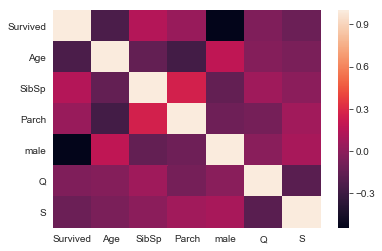

In [17]:
sns.heatmap(train.corr())

In [18]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

In [19]:
y_train

177    0
245    0
412    1
806    0
887    1
269    1
872    0
669    1
742    1
536    0
340    1
307    1
429    1
128    1
741    0
645    1
66     1
268    1
591    1
544    0
284    0
456    0
460    1
473    1
712    1
647    1
802    1
815    0
862    1
139    0
      ..
558    1
102    0
329    1
230    1
715    0
297    0
781    1
701    1
515    0
609    1
498    0
366    1
257    1
853    1
627    1
21     1
496    1
298    1
740    1
871    1
585    1
209    1
618    1
336    0
390    1
305    1
325    1
351    0
55     1
438    0
Name: Survived, Length: 141, dtype: int64

In [20]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [21]:
predictions = logmodel.predict(X_test)

In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_test,predictions)
confusion_matrix

array([[13,  7],
       [ 8, 33]], dtype=int64)

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.62      0.65      0.63        20
           1       0.82      0.80      0.81        41

   micro avg       0.75      0.75      0.75        61
   macro avg       0.72      0.73      0.72        61
weighted avg       0.76      0.75      0.76        61

